# CLUSTERING - K-MEANS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
pp_train = pd.read_csv("pp_train.csv")
pp_train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,is_Fantasy,is_Family,is_Mystery,is_Talk-Show,is_Drama,is_Sport,is_War,is_Horror,is_Animation,fill_runtimeMinutes
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,0,21,...,0,0,0,0,0,0,0,0,1,40.0
1,Looping,6,1982,NaN,NaN,0.0,11,1,0,1,...,0,0,0,0,0,0,0,0,0,28.0
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,0,24,...,0,0,0,0,0,0,0,0,0,90.0
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,0,0,0,0,0,0,0,0,0,31.0
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,0,0,0,0,1,0,0,0,0,80.0


In [38]:
pp_train.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'countryOfOrigin', 'is_Documentary', 'is_History', 'is_Adventure',
       'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance',
       'is_Biography', 'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir',
       'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime',
       'is_Short', 'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show',
       'is_Drama', 'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes'],
      dtype='object')

### Definizione delle feature numeriche da usare per clustering

In [63]:
numeric = pp_train[["awardWins", "totalVideos", "awardNominationsExcludeWins", "startYear", "numVotes", "totalImages", "totalCredits", "criticReviewsTotal", 
                    "numRegions", "userReviewsTotal", "fill_runtimeMinutes"]].values

#da qui escludiamo endYear perchè ha dei NaN e k-means non sa gestirli
#inizio a eliminare qualche var ---> [

In [40]:
zero_counts = (pp_train == 0).sum()
zero_counts

originalTitle                      0
rating                             0
startYear                          0
endYear                            0
runtimeMinutes                     1
awardWins                      14589
numVotes                           0
totalImages                     3290
totalVideos                    14821
totalCredits                     117
criticReviewsTotal             11439
titleType                          0
awardNominationsExcludeWins    14427
canHaveEpisodes                14832
isAdult                        16005
numRegions                         0
userReviewsTotal                9229
countryOfOrigin                    0
is_Documentary                 14596
is_History                     16076
is_Adventure                   14833
is_Thriller                    15646
is_Game-Show                   16181
is_Comedy                      11669
is_Sci-Fi                      15982
is_Romance                     15048
is_Biography                   16154
i

### Log-transformation delle variabili numeriche

In [64]:
X_numeric_log = np.log1p(numeric)
#data_log = np.log1p(numeric)
#X_numeric_log = data_log.values
#X = pp_train.iloc[:,:].values ---> questo comodo se nel dataset avessimo solo var numeriche

### Normalizzazione con z-score e minmax

In [65]:
scaler = StandardScaler() 
scaler.fit(X_numeric_log) #x è la numpy matrix of the dataset
X_scal = scaler.transform(X_numeric_log)

In [43]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X_numeric_log)

### Choice of the optimal number of clusters

###### il ciclo for su k permette di identificare il best number of clusters da utilizzare nell'algoritmo; lo si trova vedendo SSE e silhouette

In [66]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_scal) 
    #kmeans.fit(X_minmax) 
    sse_list.append(kmeans.inertia_)

In [67]:
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_scal)
    #kmeans.fit(X_minmax) 
    sil_list.append(silhouette_score(X_scal, kmeans.labels_))
    #sil_list.append(silhouette_score(X_minmax, kmeans.labels_))

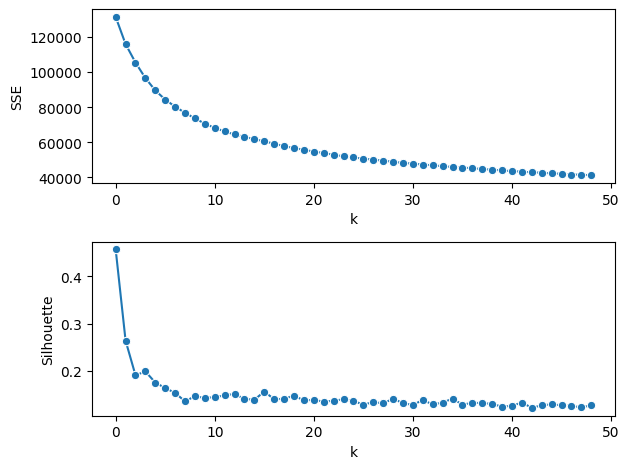

In [68]:
fig, axs = plt.subplots(2) 

sns.lineplot(x=range(len(sse_list)), y=sse_list, marker='o', ax=axs[0])
axs[0].set(xlabel='k', ylabel='SSE')

sns.lineplot(x=range(len(sil_list)), y=sil_list, marker='o', ax=axs[1])
axs[1].set(xlabel='k', ylabel='Silhouette')

plt.tight_layout()

## SULLA BASE DEI VALORI QUI SOPRA INIZIALIZZARE IL MODELLO CON IL NUMERO ADATTO DI K

### Inizializzazione modello

In [55]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=94) #inizializziamo algoritmo, fit it per lavorare sull'exact data
#iniziamo con 3 cluster, 10 iterations, random_state: allows to have the same result 

clusters = kmeans.fit_predict(X_scal)
#kmeans.fit(X_minmax)
#kmeans.fit(D_scaled) #---> numpy array di mixed matrix tra distanze di var numeriche e var binarie (per configurazione vedere drive)

### Visualizzazione cluster
#### ---> per selezionare le feature da mettere sugli assi, chat dice di valutare la correlation matrix

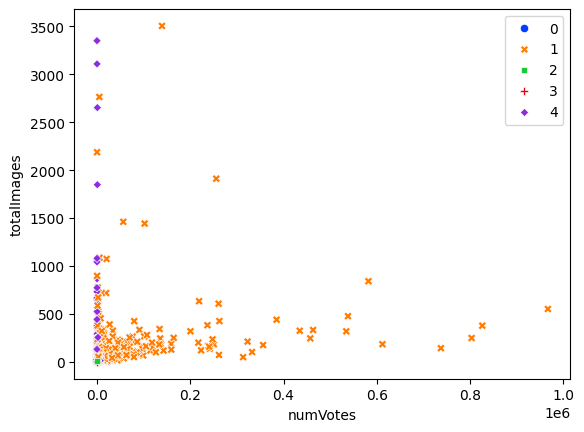


Cluster Distribution:
-------------------
Cluster 0: 1566 points (9.53%)
Cluster 1: 1187 points (7.22%)
Cluster 2: 2532 points (15.41%)
Cluster 3: 7597 points (46.24%)
Cluster 4: 3549 points (21.60%)


In [56]:
sns.scatterplot(data=pp_train, 
                x="numVotes",
                y="totalImages",
                hue=kmeans.labels_,
                style=kmeans.labels_, #usiamo labels date da k-means
                palette="bright")
#plt.xscale("log")
#plt.yscale("log")
plt.show()

total_points = len(clusters)
unique, counts = np.unique(clusters, return_counts=True)
percentages = counts / total_points * 100

# Print summary
print("\nCluster Distribution:")
print("-------------------")
for cluster, count, percentage in zip(unique, counts, percentages):
    print(f"Cluster {cluster}: {count} points ({percentage:.2f}%)")

In [57]:
print('SSE', kmeans.inertia_) #il valore di sse che compare varia con il numero di k che scegliamo per inizializzare il metodo
print('Silhouette', silhouette_score(X_scal, kmeans.labels_))

SSE 62067.91316920446
Silhouette 0.1874182543882694


### Identificazione numero di componenti per PCA

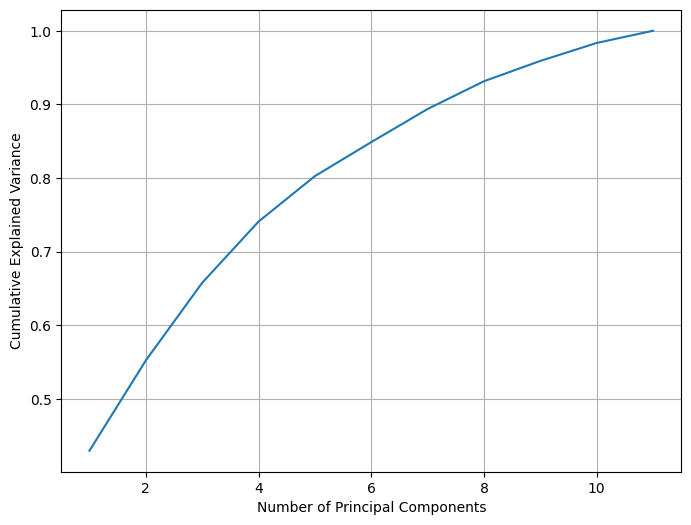

In [60]:
from sklearn.preprocessing import StandardScaler

def visualize_pca_components(df):
    # Select clustering variables ----------------------------------------------------->   
    features = ['awardWins', 'totalVideos', 'awardNominationsExcludeWins','startYear','fill_runtimeMinutes',  'numVotes', 
                'totalImages',  'totalCredits', 'criticReviewsTotal', 
                'numRegions', 'userReviewsTotal']
    X = df[features]
    
    # Apply log transformation to handle skewness
    X = np.log1p(X)
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    pca = PCA()
    pca.fit(X_scaled)
    
    # Calculate cumulative explained variance ratio
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    #ax.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio, marker='o')
    ax.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio)
    plt.grid()
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('Cumulative Explained Variance')
    plt.show()

# Example usage
visualize_pca_components(pp_train)


In [61]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def determine_pca_components(df):
    # Select clustering variables ------------------------------------------------->   
    features = ['awardWins', 'totalVideos', 'awardNominationsExcludeWins','startYear', 'fill_runtimeMinutes', 'numVotes', 
                'totalImages', 'totalCredits', 'criticReviewsTotal', 
                'numRegions', 'userReviewsTotal']
    X = df[features]
    
    # Apply log transformation to handle skewness
    X = np.log1p(X)
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    pca = PCA()
    pca.fit(X_scaled)
    
    # Calculate cumulative explained variance ratio
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Determine optimal number of components
    for i, ratio in enumerate(cum_var_ratio):
        if ratio >= 0.8:
            return i + 1
    
    return len(cum_var_ratio)

# Example usage
pp_train = pd.read_csv('pp_train.csv')
optimal_components = determine_pca_components(pp_train)
print(f"Optimal number of principal components: {optimal_components}")

Optimal number of principal components: 5


### Pairplot per valutare visualizzazione di clustering con numero di PC identificate come ottimali

C:\Users\Gagia\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


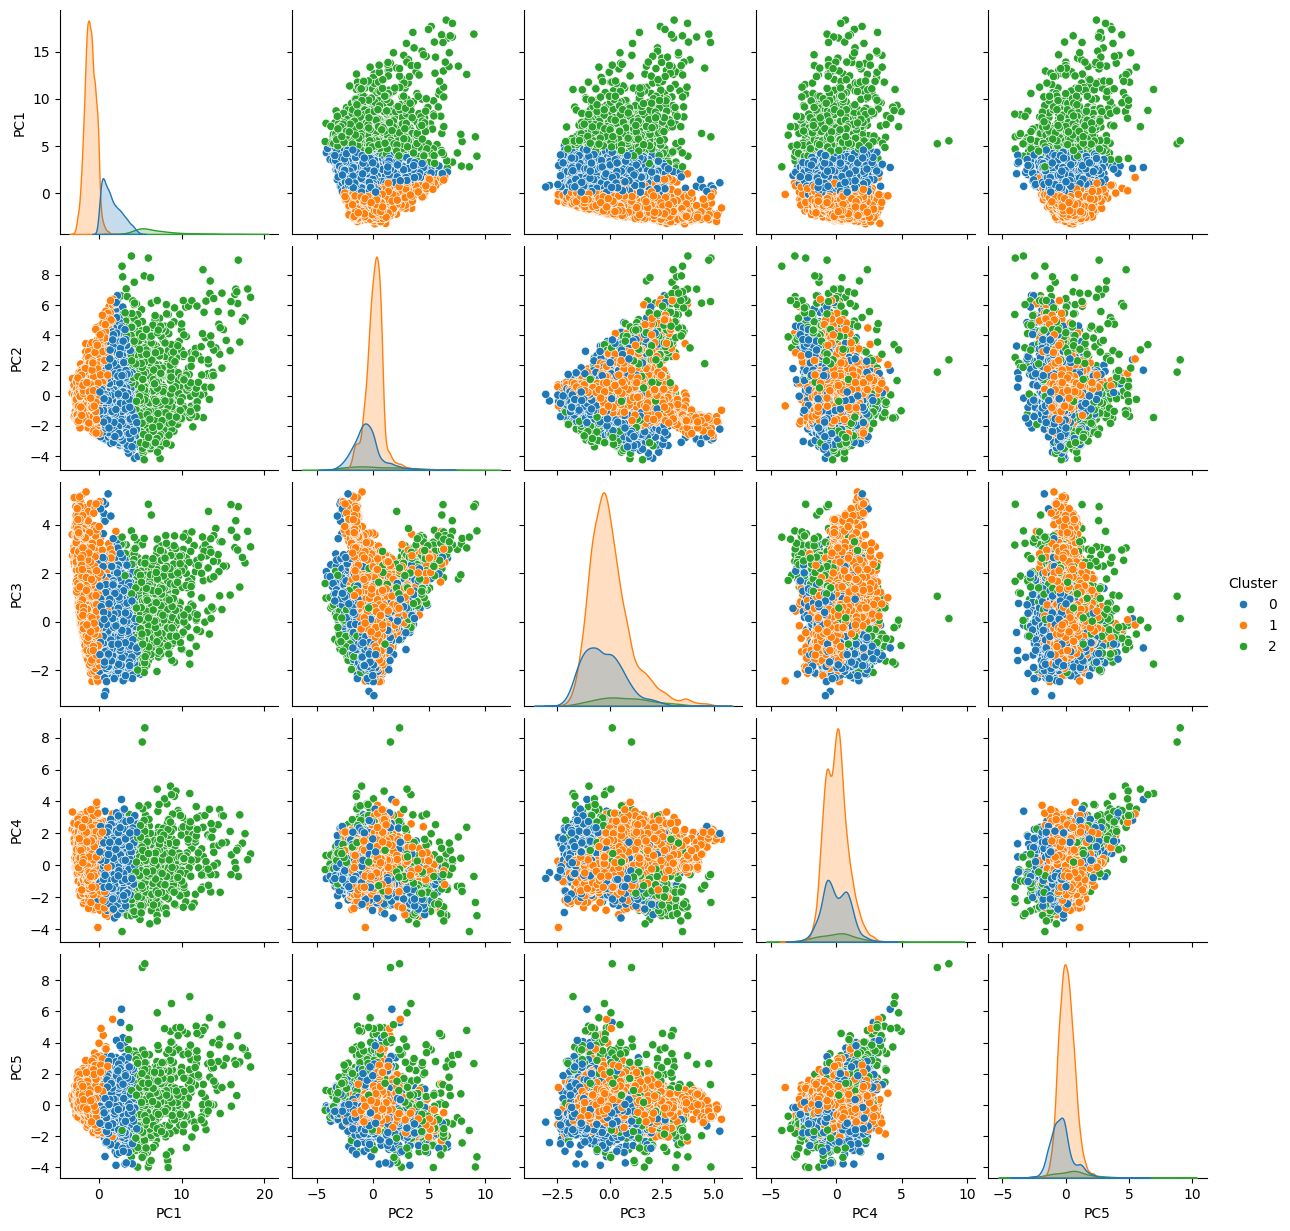

In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pca_kmeans(df, features, n_components=5, n_clusters=4):
    """
    Applica PCA e K-Means ai dati preprocessati e visualizza i risultati.

    :param df: DataFrame originale con i dati
    :param features: Lista delle feature da utilizzare
    :param n_components: Numero di componenti principali per la PCA
    :param n_clusters: Numero di cluster per il K-Means
    """
    # Preprocessamento: Log-transform e scaling
    X = df[features].copy()
    X = np.log1p(X)  # Log-transform
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Applica PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Crea un DataFrame con le componenti principali
    pca_columns = [f"PC{i+1}" for i in range(n_components)]
    pca_df = pd.DataFrame(X_pca, columns=pca_columns)

    # Applica K-Means sui dati preprocessati (X_scaled)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Aggiungi i cluster come colonna al DataFrame delle componenti principali
    pca_df['Cluster'] = clusters

    # Visualizza un pairplot delle prime 3 componenti principali colorate per cluster
    sns.pairplot(
        data=pca_df,
        vars=["PC1", "PC2", "PC3", "PC4", "PC5"],  #--------------------------------------------> 
        hue="Cluster",               # Colora in base ai cluster
        diag_kind="kde",             # Distribuzione kernel sulle diagonali
        palette="tab10"              # Palette di colori per i cluster
    )

    plt.show()

# Esempio di utilizzo ----------------------------------------------------------------->  
features = [
   "awardWins", "totalVideos", "awardNominationsExcludeWins","startYear",  "numVotes", "totalImages", 
    "totalCredits", "criticReviewsTotal", 
    "numRegions", "userReviewsTotal", "fill_runtimeMinutes"
]

# Supponendo che il DataFrame originale sia chiamato `df`
plot_pca_kmeans(pp_train, features, n_components=5, n_clusters=3) #-------------------------------------->giocare un po' con questi parametri


## SECONDO CLAUDE, LA CONFIGURAZIONE MIGLIORE E' QUELLA OTTENUTA FACENDO UNA CLUSTERING ANALYSIS ESCLUDENDO LE VAR CON TANTI ZERI ("awardWins", "totalVideos", "awardNominationsExcludeWins") E SCEGLIENDO UN K = 4

### Identify the distribution of titleTypes across clusters

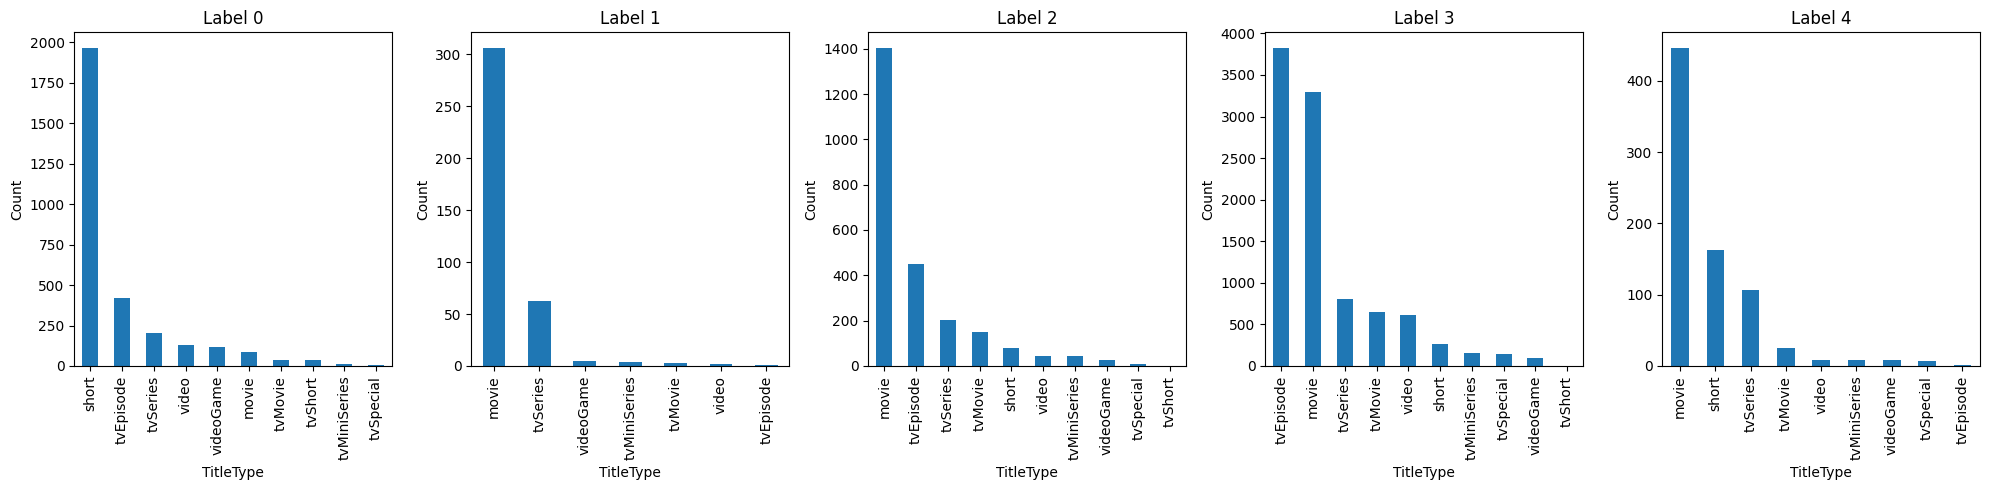

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for each cluster
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # Adjust figure size as needed

# For each cluster
for i in range(5):
    # Count titleType frequencies for this cluster
    title_counts = pp_train[clusters == i]['titleType'].value_counts()
    
    # Create bar plot in the corresponding subplot
    ax = axes[i]
    title_counts.plot(kind='bar', ax=ax)
    
    # Customize subplot
    ax.set_title(f'Label {i}')
    ax.set_xlabel('TitleType')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x')  # Rotate x labels for better readability

# Adjust layout to prevent label overlap
plt.tight_layout()
plt.show()

### Identificazione dei centroidi

In [113]:
kmeans.cluster_centers_ #coordinates with centroids

array([[-4.78460876e-01, -1.60445379e-01, -5.38955485e-01,
        -4.60054925e-01, -2.07276043e-01, -1.21979497e+00,
        -4.05254796e-01, -2.20102923e-01, -4.46687443e-01,
        -3.35112588e-01, -1.62232645e+00],
       [ 1.71940859e-01, -2.35999544e-01, -5.46314491e-01,
        -5.06591165e-01, -2.17779155e-01, -1.33644473e-01,
        -4.13763838e-01, -2.40893926e-01, -3.55930602e-01,
        -5.02398254e-01,  2.45441616e-01],
       [-9.15487733e-02, -2.07121485e-01,  5.53010933e-01,
         5.28881418e-01, -6.80352969e-02,  5.43337521e-01,
         8.04727430e-02, -2.05671175e-01,  8.65043634e-02,
         2.59919605e-01,  2.39251274e-01],
       [ 5.40095387e-01,  2.85874231e+00,  4.50338162e-01,
         4.89520044e-01,  1.16285117e-01,  4.16711684e-01,
         5.14489110e-01,  2.47898756e+00,  5.17464863e-01,
         2.44906009e-01,  2.81330424e-01],
       [ 4.18774159e-01,  3.21338708e+00,  3.24307871e+00,
         2.65391884e+00,  4.43418801e+00,  1.89440188e+00,
  

In [114]:
centers = scaler.inverse_transform(kmeans.cluster_centers_) #from normalized to input domain
centers

array([[ 7.50269178e+00, -7.99596654e-01, -4.67017958e+00,
        -3.75494336e+00, -1.15179733e+00, -1.17882829e+01,
        -2.54516054e+00, -1.16396303e+00, -8.94982154e-01,
        -2.89977001e+00, -1.29894826e+01],
       [ 7.55136133e+00, -1.17612889e+00, -4.75841218e+00,
        -4.13476963e+00, -1.21016132e+00, -1.29156038e+00,
        -2.59860069e+00, -1.27391141e+00, -5.72309996e-01,
        -4.34731324e+00,  1.96517759e+00],
       [ 7.53164441e+00, -1.03221200e+00,  8.42221975e+00,
         4.31670147e+00, -3.78060447e-01,  5.25089590e+00,
         5.05400680e-01, -1.08764409e+00,  1.00070030e+00,
         2.24911598e+00,  1.91561338e+00],
       [ 7.57891033e+00,  1.42468471e+01,  7.19119938e+00,
         3.99543607e+00,  6.46176399e-01,  4.02716468e+00,
         3.23119527e+00,  1.31095482e+01,  2.53291488e+00,
         2.11920151e+00,  2.25252855e+00],
       [ 7.56983186e+00,  1.60142571e+01,  4.06754475e+01,
         2.16611417e+01,  2.46400204e+01,  1.83077860e+01,
  

In [115]:
pp_train['kmeans_labels'] = kmeans.labels_
pp_train['kmeans_labels'] = pp_train['kmeans_labels'].map({0:"A", 1: "B", 2: "C"})

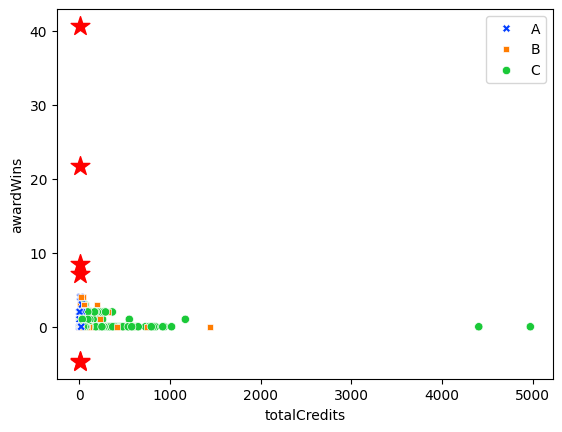

In [116]:
sns.scatterplot(data=pp_train, 
                x="totalCredits", 
                y="awardWins", 
                hue='kmeans_labels', 
                style='kmeans_labels',
                palette="bright", 
                hue_order=["A", "B", "C"]
               )
plt.legend()
#qui è giusto che centers sia :,1 se in quello di fedele dice [:,2]?
plt.scatter(centers[:,0], centers[:,2], c='red', marker='*', s=200) #plotting the centroids
plt.show()

#### Mapping della variabile target (per noi è titleType volendo) così da confrontarla dopo con gli eventuali cluster/individuare quali cluster contengono un'alta percentuale di quale categoria di titleType

In [117]:
y = np.array(pp_train['titleType'])
y_map = {"tvEpisode": 0, "videoGame": 1, "movie": 2, "tvSeries": 3, "video": 4,
         "tvMiniSeries": 5, "short": 6, "tvMovie": 7, "tvSpecial": 8, "tvShort": 9}

y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map) #target label

### Confronto con target variable

In [118]:
y_mapped

0        0
1        1
2        2
3        3
4        3
        ..
16426    2
16427    2
16428    2
16429    2
16430    6
Name: 0, Length: 16431, dtype: int64

In [119]:
y_mapped.groupby(pp_train['kmeans_labels']).value_counts(normalize=True)
#qui si vede quanta percentuale di titleType (i numeri da 0 a 9) appartiene a quale cluster (A, B, C)

kmeans_labels  0
C              0    0.400100
B              0    0.361836
A              0    0.099203
               1    0.041833
C              1    0.013470
B              1    0.010361
C              2    0.376902
B              2    0.318557
A              2    0.015538
C              3    0.090047
B              3    0.085508
A              3    0.042231
B              4    0.075541
A              4    0.039044
C              4    0.020953
B              5    0.016787
C              5    0.014218
A              5    0.003187
               6    0.738247
B              6    0.040918
C              6    0.030681
B              7    0.073311
C              7    0.047892
A              7    0.004781
B              8    0.016918
C              8    0.004989
A              8    0.001992
               9    0.013944
C              9    0.000748
B              9    0.000262
Name: proportion, dtype: float64